Pass

In [54]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py

In [55]:
# load dataset, the dataset is retrieved from kaggle.com
def load_dataset(train_file, test_file):
    f_train = h5py.File(train_file, 'r')
    f_test = h5py.File(test_file, 'r')
 
    train_set_x=np.array(f_train['train_set_x'][:])
    train_set_y=f_train['train_set_y'][:]
    test_set_x=f_test['test_set_x'][:]
    test_set_y=f_test['test_set_y'][:]
    classes=f_train['list_classes'][:]

    return train_set_x, train_set_y, test_set_x, test_set_y,classes

cat-vs-noncat data succesfully loaded
Sample data:
it is a 'non-cat' picture


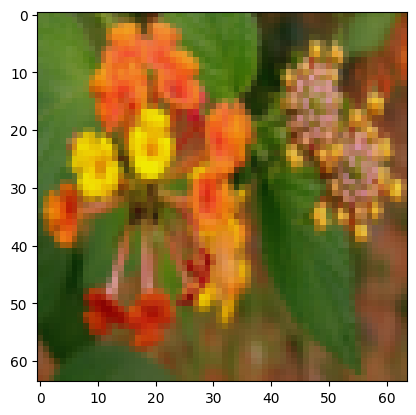

In [56]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y,classes=load_dataset('../catvnoncat/train_catvnoncat.h5','../catvnoncat/test_catvnoncat.h5')
print("cat-vs-noncat data succesfully loaded")
# Example of a picture
print("Sample data:")
index=63
plt.imshow(train_set_x_orig[index])

print ("it is a '"+ classes[(train_set_y[index])].decode("utf-8")+"' picture" )


Pass

In [57]:

# Dataset specifications
m_train= train_set_x_orig.shape[0]
m_test= test_set_x_orig.shape[0]
num_px= train_set_x_orig[index].shape[0]


print ("Number of classes: " + str(np.squeeze(classes.shape)))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of classes: 2
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


reshape can also be used for flatten operation.


In [58]:
# reshape and normalize the training and test samples
# samples should be placed column-wise
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 

print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
train_set_x = train_set_x / 255.
test_set_x = test_set_x / 255.

train_set_x shape: (12288, 209)
train_set_y shape: (209,)
test_set_x shape: (12288, 50)
test_set_y shape: (50,)


In [59]:
def sigmoid(z):

    s=1/(1+np.exp(-z))

    return s

In [60]:
# initialize with zeros

def initialize_with_zeros(dim):
    
    w=np.zeros((dim, 1))
    b=0.0
    return w, b

In [61]:
# propagate

def propagate(w, b, X, Y):

    # number of samples equivalent to number of columns of X matrix (n,m).
    m = X.shape[1]

    # forward propagation
    # compute activation
    A=sigmoid(np.dot(w.T,X)+b)
    
    # compute cost by using np.dot to perform one-by-one multiplication
    cost=-(Y*np.log(A)+(1-Y)*np.log(1-A))
    cost=np.sum(cost)/m

    # backward propagation
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m

    cost = np.array(cost)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [62]:
# optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        # Cost and gradient calculation 
        grads, cost= propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update w and b
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
    
            # Print the cost every 100 training iterations
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # After iterations are complete, record the final (w,b) and grads and costs
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Pass

In [63]:
# predict

def predict(w, b, X):

    m = X.shape[1]
    Y_predict = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute activation vector
    A=sigmoid(np.dot(w.T,X)+b)

    #converting activation values into 1 and 0 with list comprehension
    Y_predict=np.array([ A[0,i]>0.5 for i in range(A.shape[1])])
    
    return Y_predict

Pass

In [64]:
# model creation

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
  
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent 
    # Retrieve parameters w and b from dictionary "params"
    params,grads,costs=optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w=params['w']
    b=params['b']

    # Predict test/train set examples
    Y_train_predict =predict(w, b, X_train)
    Y_test_predict =predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predict - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_predict - Y_test)) * 100))

    
    model_data= {"costs": costs,
         "Y_train_predict": Y_train_predict, 
         "Y_test_predict" : Y_test_predict, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return model_data

Pass

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


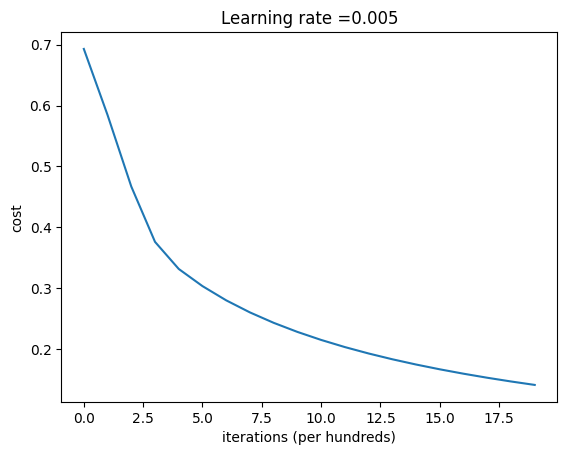

In [65]:
# model and fit 
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005)
# Plot learning curve (with costs)
costs = logistic_regression_model['costs']
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()